## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [130]:
food=pd.read_csv('food.tsv', sep='\t')

C:\Users\thech\AppData\Local\Temp\ipykernel_5516\2395730353.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  food=pd.read_csv('food.tsv', sep='\t')


In [131]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step-1 Check data shape

In [4]:
food.shape

(356027, 163)

## Step-2 Data structure

In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [6]:
food.shape[1]

163

In [7]:
food.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

## Step-3 Finding missing values

In [8]:
food.isnull().sum()

code                           26
url                            26
creator                         3
created_t                       3
created_datetime               10
                            ...  
carbon-footprint_100g      355749
nutrition-score-fr_100g    101171
nutrition-score-uk_100g    101171
glycemic-index_100g        356027
water-hardness_100g        356027
Length: 163, dtype: int64

In [9]:
# finding percentage of missing values
percentage_of_nan=food.isnull().sum().sort_values(ascending=False)/food.shape[0]*100
percentage_of_nan

water-hardness_100g       100.000000
nutrition_grade_uk        100.000000
-nervonic-acid_100g       100.000000
-erucic-acid_100g         100.000000
-mead-acid_100g           100.000000
                             ...    
created_datetime            0.002809
created_t                   0.000843
creator                     0.000843
last_modified_datetime      0.000000
last_modified_t             0.000000
Length: 163, dtype: float64

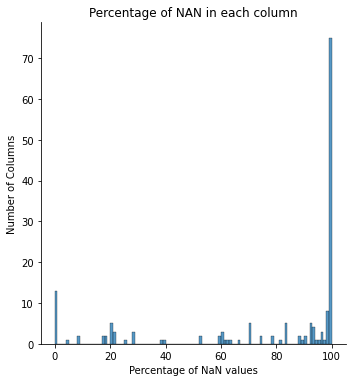

In [10]:
# plotting displot to visualize the percentage of NaN values
sns.displot(percentage_of_nan, bins=100, kde=False)
plt.xlabel('Percentage of NaN values')
plt.ylabel('Number of Columns')
plt.title('Percentage of NAN in each column')
plt.show()

In [11]:
# Checking how many features have 100% missing values
futile_features=percentage_of_nan[percentage_of_nan==100].index
futile_features

Index(['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g',
       '-melissic-acid_100g', 'glycemic-index_100g'],
      dtype='object')

In [12]:
len(futile_features)

16

In [13]:
# dropping futile features
food.drop(futile_features, axis=1, inplace=True)

In [14]:
food.shape[1]

147

In [15]:
# Checking features with no missing values
features_with_no_nan=percentage_of_nan[percentage_of_nan==0].index
features_with_no_nan

Index(['last_modified_datetime', 'last_modified_t'], dtype='object')

In [16]:
len(features_with_no_nan)

2

In [18]:
# Splitting dataset into three categories based on NaN values
low_nan_features=percentage_of_nan[percentage_of_nan<=15].index
middle_nan_features=percentage_of_nan[(percentage_of_nan>15) & (percentage_of_nan<40)].index
high_nan_features=percentage_of_nan[percentage_of_nan>40].index


<AxesSubplot:>

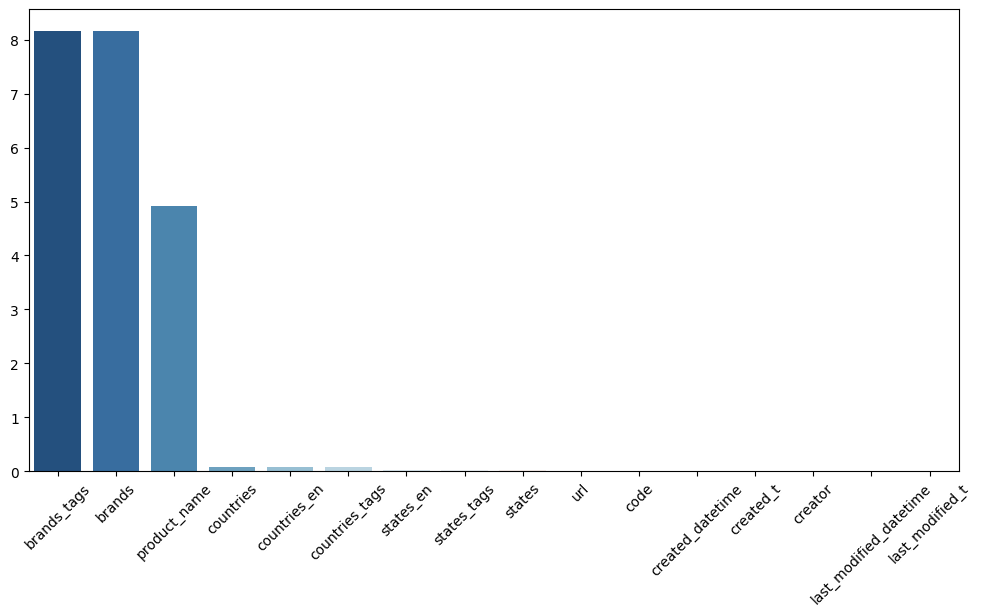

In [19]:
# plotting all the features with low, middle and high NaN values
from matplotlib.pyplot import xticks, yticks
plt.gcf().set_size_inches(12, 6)
xticks(rotation=45)
sns.barplot(x=low_nan_features, y=percentage_of_nan[low_nan_features], palette='RdBu_r')

<AxesSubplot:>

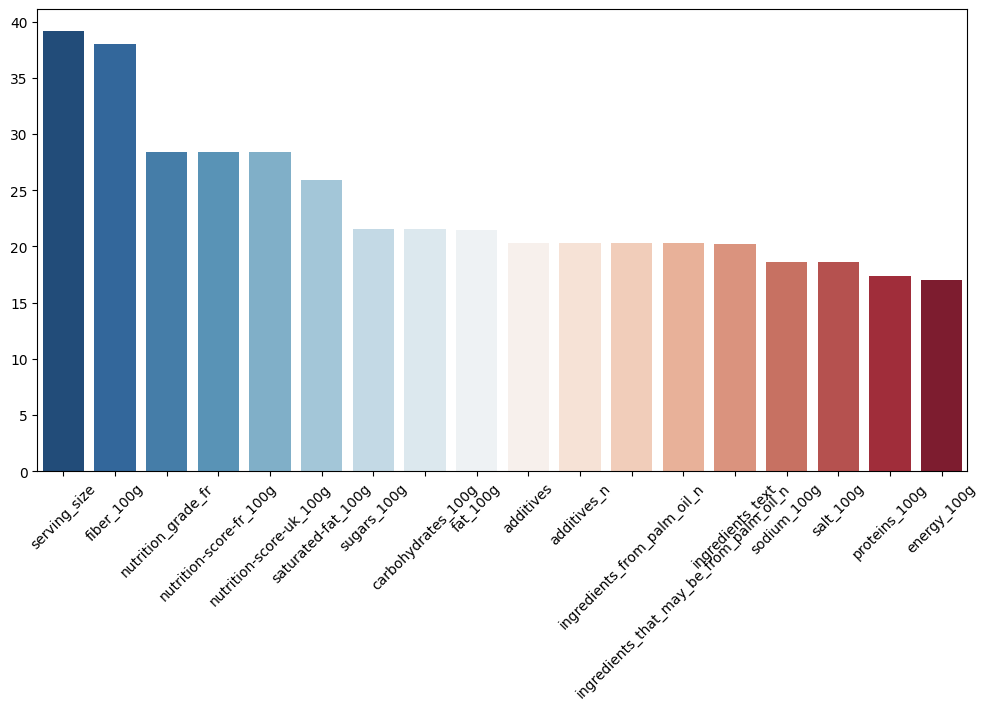

In [20]:
plt.gcf().set_size_inches(12, 6)
xticks(rotation=45)
sns.barplot(x=middle_nan_features, y=percentage_of_nan[middle_nan_features], palette='RdBu_r')

<AxesSubplot:>

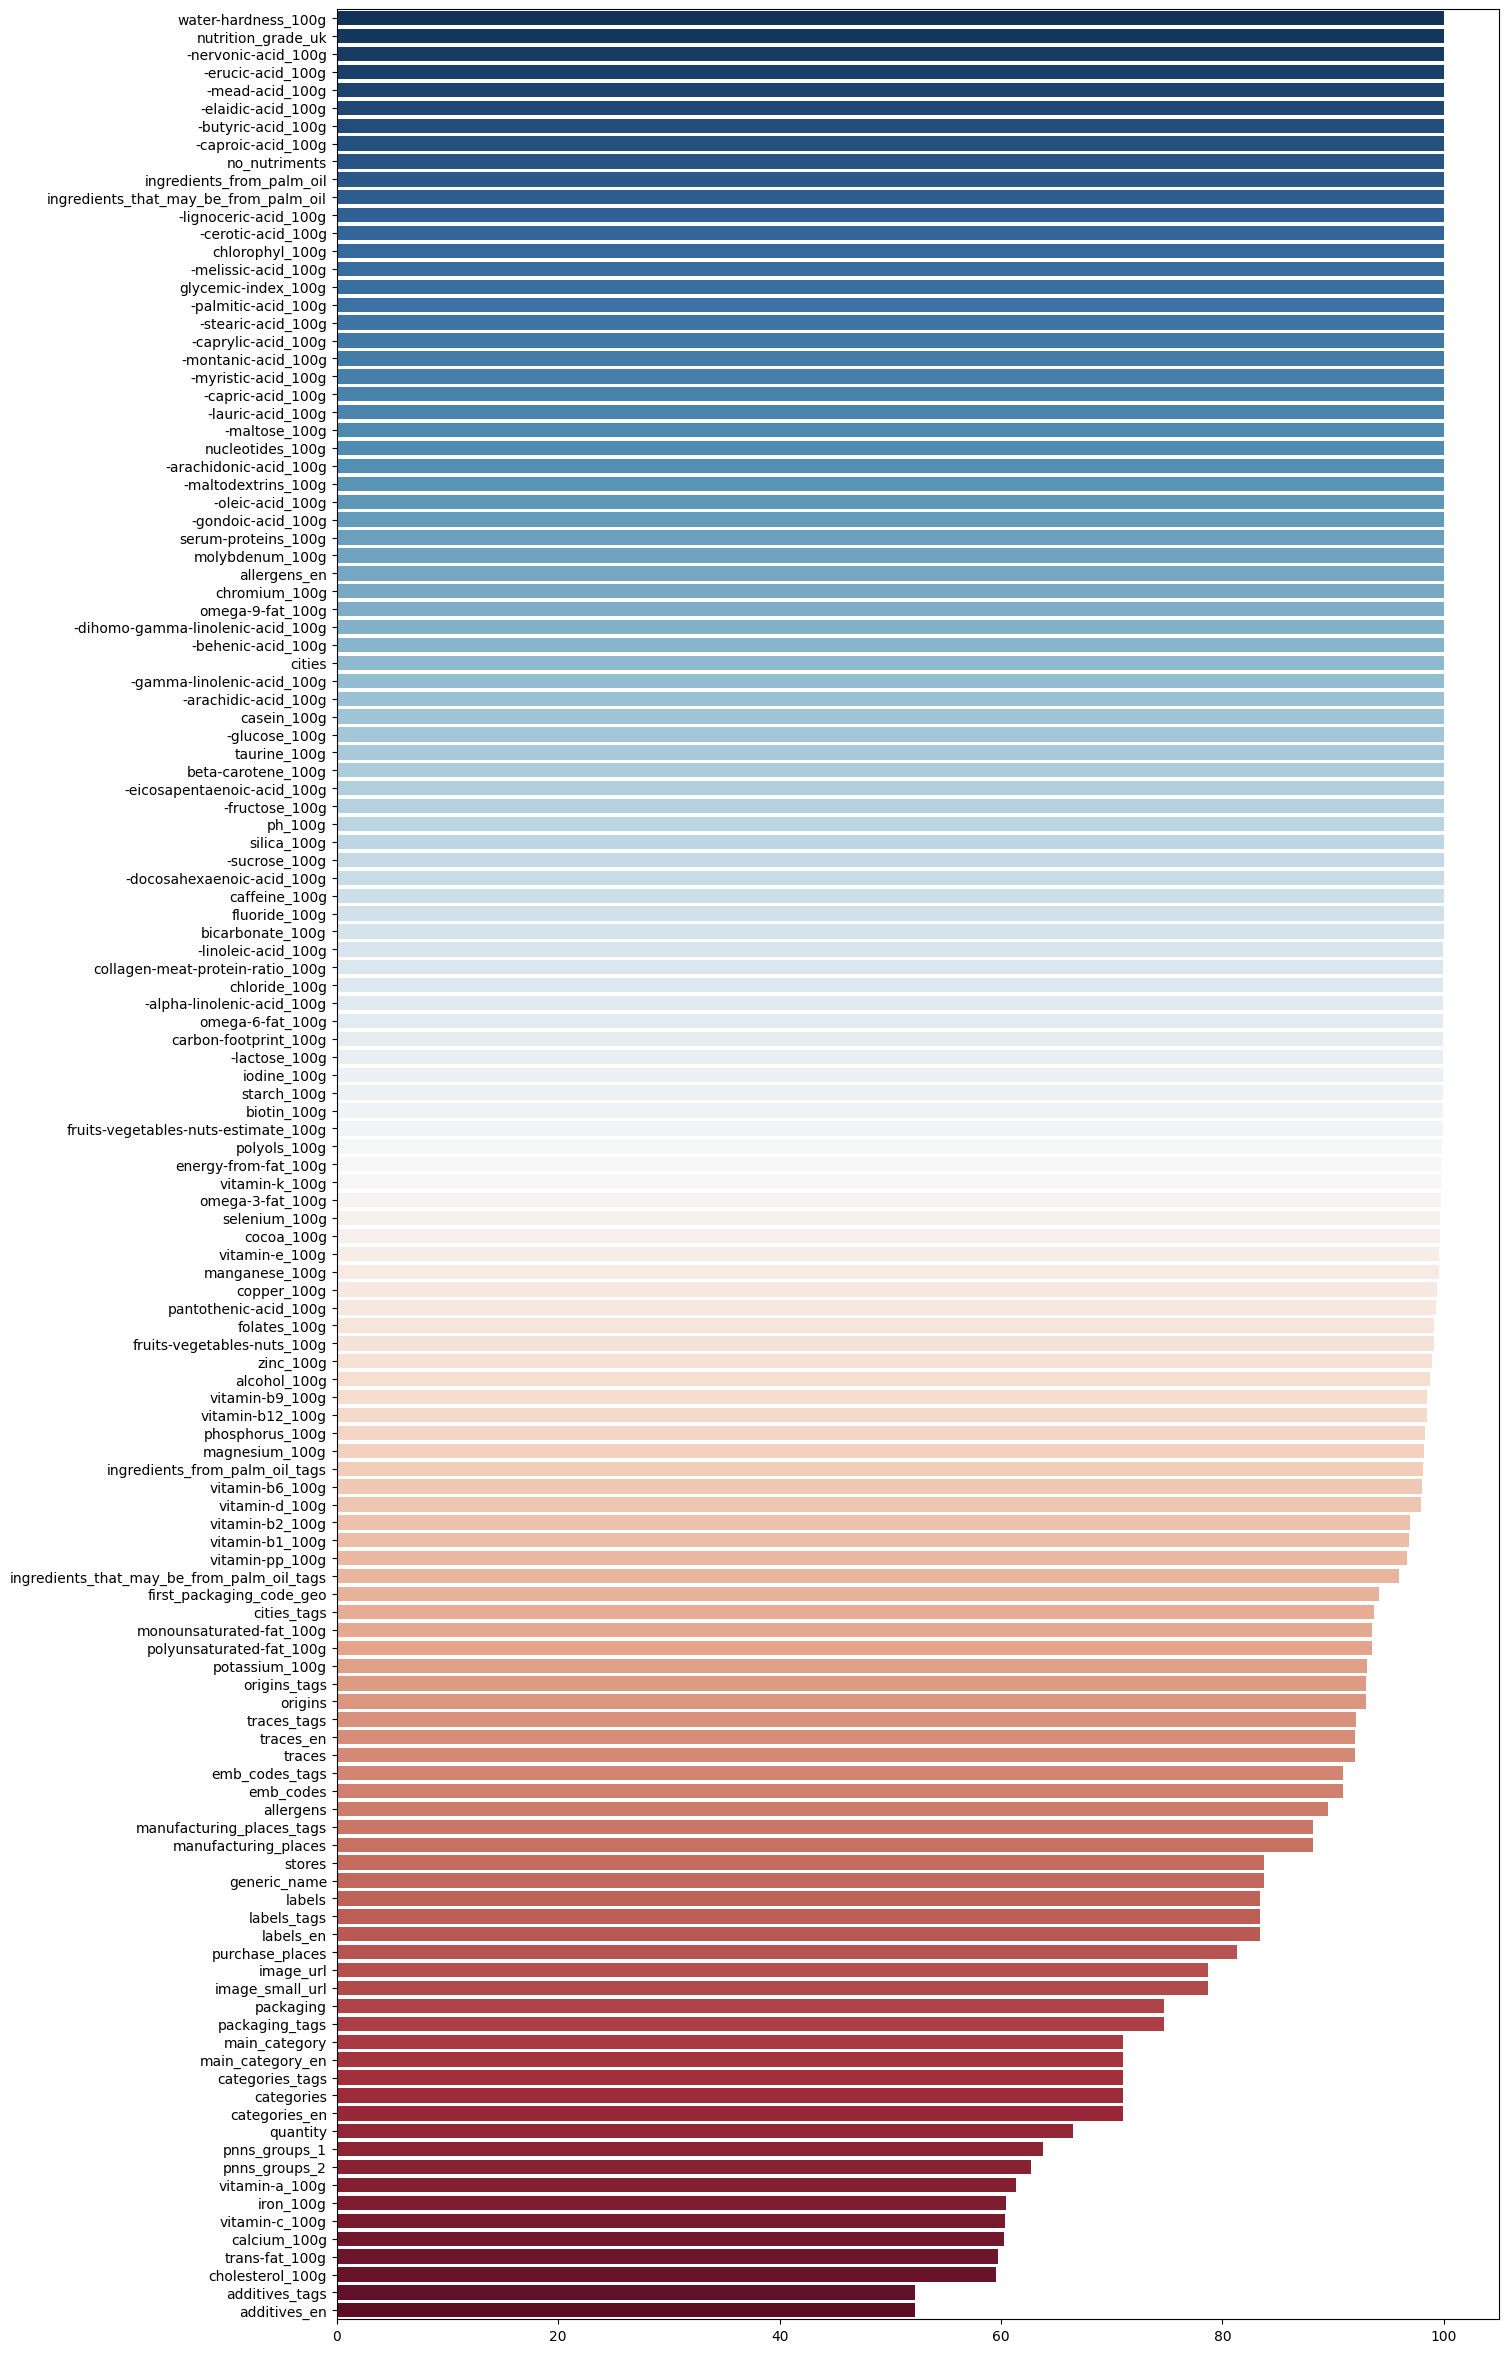

In [21]:
plt.gcf().set_size_inches(15, 30)
sns.barplot(x=percentage_of_nan[high_nan_features], y=high_nan_features, palette='RdBu_r')

In [132]:
food.drop(high_nan_features, axis=1, inplace=True)

In [135]:
food.shape[1]

34

In [139]:
food_sample=food.sample(frac=0.08, random_state=1)

In [150]:
food_sample.shape

(28482, 36)

## Step-4 Type casting

In [140]:
food_sample['last_modified_datetime'].dtype

dtype('O')

In [142]:
food_sample['last_modified_datetime']=food['last_modified_datetime'].astype(str)

## Step-5 Splitting categorical variable into different variables

In [143]:
food_sample.last_modified_datetime.str.split('T',expand=True)

,0,1
131669,2017-03-09,16:33:38Z
129252,2017-03-09,21:46:50Z
85466,2017-03-09,13:20:13Z
242072,2017-04-23,16:47:38Z
76726,2017-03-09,15:00:22Z
...,...,...
47212,2017-03-10,10:56:01Z
344405,2017-04-07,15:51:41Z
302952,2017-03-06,07:29:51Z
25689,2017-03-10,08:55:13Z


In [144]:
# Adding into new columns
food_sample['last_modified_date']=food_sample['last_modified_datetime'].str.split('T',expand=True)[0]
food_sample['last_modified_time']=food_sample['last_modified_datetime'].str.split('T',expand=True)[1]


## Step-6 Summary of the data

In [145]:
food_sample.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,22726.000000,22726.000000,22726.000000,23695.000000,22403.000000,21241.000000,22399.000000,22404.000000,17733.000000,23591.000000,23246.000000,23239.000000,20534.000000,20534.000000
mean,1.879125,0.023145,0.059667,1131.604377,12.807859,5.033790,31.754989,15.728135,2.841001,7.250198,1.839694,0.724507,9.195432,9.008620
std,2.496721,0.152979,0.275521,820.802584,17.454241,7.883431,29.123117,21.028960,4.580428,12.731802,20.210712,7.958182,8.999826,9.146474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,-13.000000,-13.000000
25%,0.000000,0.000000,0.000000,388.000000,0.100000,0.000000,5.500000,1.200000,0.000000,0.795000,0.060000,0.023622,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1105.000000,5.260000,1.790000,20.000000,5.360000,1.500000,4.920000,0.558800,0.220000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,20.000000,7.140000,58.000000,23.530000,3.600000,10.000000,1.361440,0.536000,16.000000,16.000000
max,29.000000,2.000000,4.000000,26861.000000,100.000000,100.000000,139.000000,100.000000,85.000000,1476.000000,2177.143220,857.143000,40.000000,40.000000


## Step-7 Value counts

In [146]:
food_sample['carbohydrates_100g'].value_counts()

0.00     1874
3.57      370
50.00     292
6.67      244
75.00     231
         ... 
30.12       1
9.43        1
51.15       1
5.73        1
67.35       1
Name: carbohydrates_100g, Length: 2745, dtype: int64

## Step-8 Remove duplicates

In [163]:
food_sample.drop_duplicates(inplace=True)

## Step-9 Checking data normalization

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

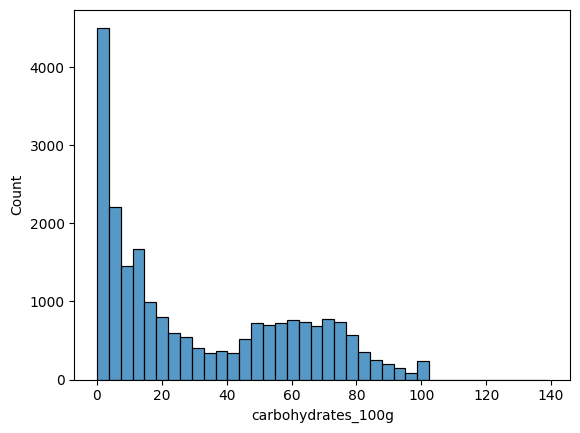

In [147]:
sns.histplot(food_sample['carbohydrates_100g'])

In [148]:
food_sample['carbohydrates_100g'].agg(['skew', 'kurtosis']).transpose() # skew means how much the data is skewed to the left or right
                                                                  # kurtosis is how much the data is skewed to the top or bottom

skew        0.569420
kurtosis   -1.061835
Name: carbohydrates_100g, dtype: float64

<AxesSubplot:xlabel='carbohydrates_100g'>

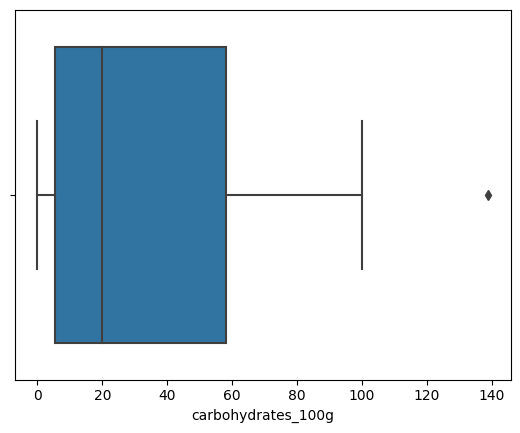

In [149]:
sns.boxplot(x='carbohydrates_100g', data=food_sample)

## Step-10 Correlation Analysis

In [156]:
corr=food_sample.corr(method="pearson")
corr

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
additives_n,1.000000,0.139472,0.289839,-0.006011,-0.110163,-0.048359,0.161119,0.155730,-0.149888,-0.117024,-0.009964,-0.009979,0.170233,0.165742
ingredients_from_palm_oil_n,0.139472,1.000000,0.191698,0.103134,0.058554,0.086667,0.096798,0.070195,0.001629,-0.012264,-0.006891,-0.006895,0.129872,0.132633
ingredients_that_may_be_from_palm_oil_n,0.289839,0.191698,1.000000,0.025367,0.019736,0.032576,0.022895,0.004232,-0.043889,-0.040392,-0.008742,-0.008734,0.061070,0.061388
energy_100g,-0.006011,0.103134,0.025367,1.000000,0.754655,0.555790,0.478125,0.317715,0.267685,0.261952,-0.012795,-0.012815,0.612205,0.649838
fat_100g,-0.110163,0.058554,0.019736,0.754655,1.000000,0.690616,-0.095552,-0.057977,0.131998,0.219398,-0.002709,-0.002722,0.552088,0.591156
saturated-fat_100g,-0.048359,0.086667,0.032576,0.555790,0.690616,1.000000,-0.064321,0.093239,-0.012797,0.142893,0.007224,0.007215,0.618183,0.642081
carbohydrates_100g,0.161119,0.096798,0.022895,0.478125,-0.095552,-0.064321,1.000000,0.671346,0.244335,-0.098893,-0.023926,-0.023944,0.247519,0.251213
sugars_100g,0.155730,0.070195,0.004232,0.317715,-0.057977,0.093239,0.671346,1.000000,-0.021624,-0.261881,-0.029708,-0.029719,0.460990,0.448970
fiber_100g,-0.149888,0.001629,-0.043889,0.267685,0.131998,-0.012797,0.244335,-0.021624,1.000000,0.237784,0.015438,0.015421,-0.157509,-0.147851
proteins_100g,-0.117024,-0.012264,-0.040392,0.261952,0.219398,0.142893,-0.098893,-0.261881,0.237784,1.000000,-0.001457,-0.001463,0.088352,0.118964


<AxesSubplot:>

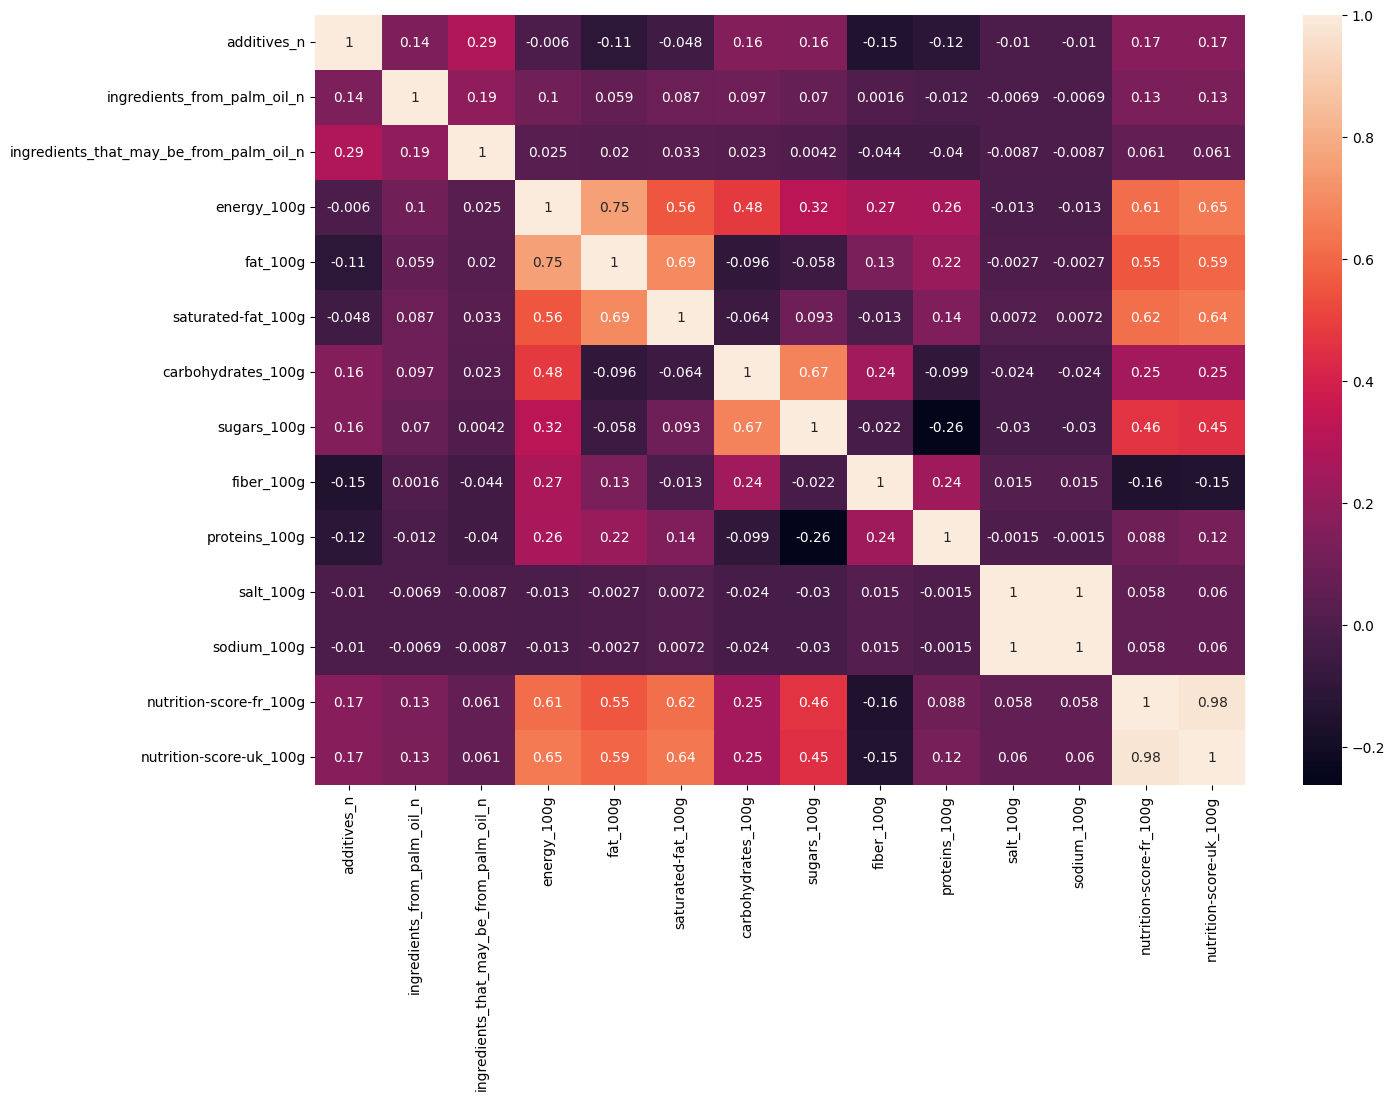

In [160]:
plt.gcf().set_size_inches(15, 10)
sns.heatmap(corr, annot=True)